In [15]:
import pandas as pd
import numpy as np
import pytimetk as tk

In [17]:
raw_df=pd.read_csv('mediamix_sales.csv', parse_dates=['Time'])

# Mixed Media Model Notebook

In this notebook, my hope is to showcase ongoing efforts to learn about Media Mixed Model methods as applied using PYMC and how they can be applied to real world cases. I have chosen to work with a data set taken from kaggel for this exercise.

## Description of Data
### Source
- [https://www.kaggle.com/datasets/mediaearth/traditional-and-digital-media-impact-on-sales](https://www.kaggle.com/datasets/mediaearth/traditional-and-digital-media-impact-on-sales)
### Period
- Monthy Intervals from 1/01 to 08/17
### Media Variables
- tv_sponsorships
- tv_cricket 
- tv_RON
- radio 
- NPP 
- Magazines 
- OOH: Out Of Home Spend (Billboards, ect.) 
- Social: Social Media Spend 
- Programmatic 
- Display_Rest 
- Search 
- Native 
### Target Variable
- sales
### Assumptions
- 

## Exploring The Data

In [18]:
raw_df.head()

,Time,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
0,2001-01-01,119.652,66.729,43.719,37.8,55.36,13.84,35,41.8782,5,33.50256,26.802048,5,22100
1,2001-01-02,23.140,12.905,8.455,39.3,36.08,9.02,35,8.0990,5,6.47920,5.183360,6,10400
2,2001-01-03,8.944,4.988,3.268,45.9,55.44,13.86,35,3.1304,5,2.50432,2.003456,7,9300
3,2001-01-04,78.780,43.935,28.785,41.3,46.80,11.70,35,27.5730,5,22.05840,17.646720,5,18500
4,2001-01-05,94.016,52.432,34.352,10.8,46.72,11.68,35,32.9056,5,26.32448,21.059584,7,12900


In [5]:
raw_df.shape

(200, 14)

array([[<Axes: xlabel='tv_sponsorships', ylabel='tv_sponsorships'>,
        <Axes: xlabel='tv_cricket', ylabel='tv_sponsorships'>,
        <Axes: xlabel='tv_RON', ylabel='tv_sponsorships'>,
        <Axes: xlabel='radio', ylabel='tv_sponsorships'>,
        <Axes: xlabel='NPP', ylabel='tv_sponsorships'>,
        <Axes: xlabel='Magazines', ylabel='tv_sponsorships'>,
        <Axes: xlabel='OOH', ylabel='tv_sponsorships'>,
        <Axes: xlabel='Social', ylabel='tv_sponsorships'>,
        <Axes: xlabel='Programmatic', ylabel='tv_sponsorships'>,
        <Axes: xlabel='Display_Rest', ylabel='tv_sponsorships'>,
        <Axes: xlabel='Search', ylabel='tv_sponsorships'>,
        <Axes: xlabel='Native', ylabel='tv_sponsorships'>,
        <Axes: xlabel='sales', ylabel='tv_sponsorships'>],
       [<Axes: xlabel='tv_sponsorships', ylabel='tv_cricket'>,
        <Axes: xlabel='tv_cricket', ylabel='tv_cricket'>,
        <Axes: xlabel='tv_RON', ylabel='tv_cricket'>,
        <Axes: xlabel='radio', ylabel

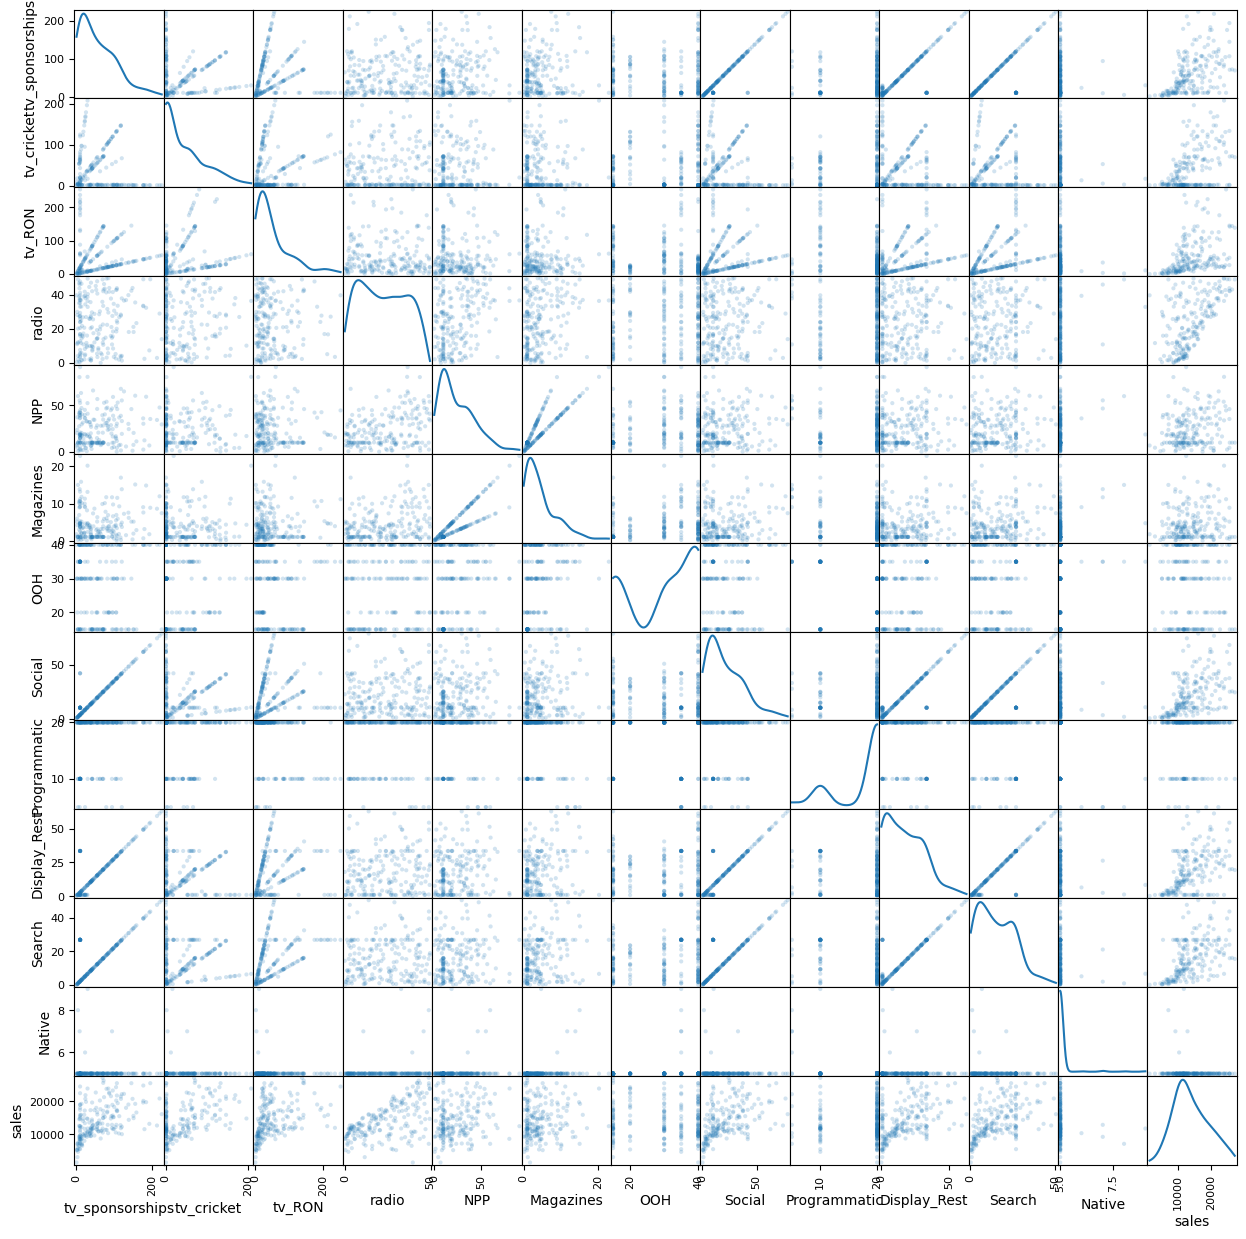

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(raw_df, alpha=0.2, figsize=(15, 15), diagonal="kde")




<Axes: >

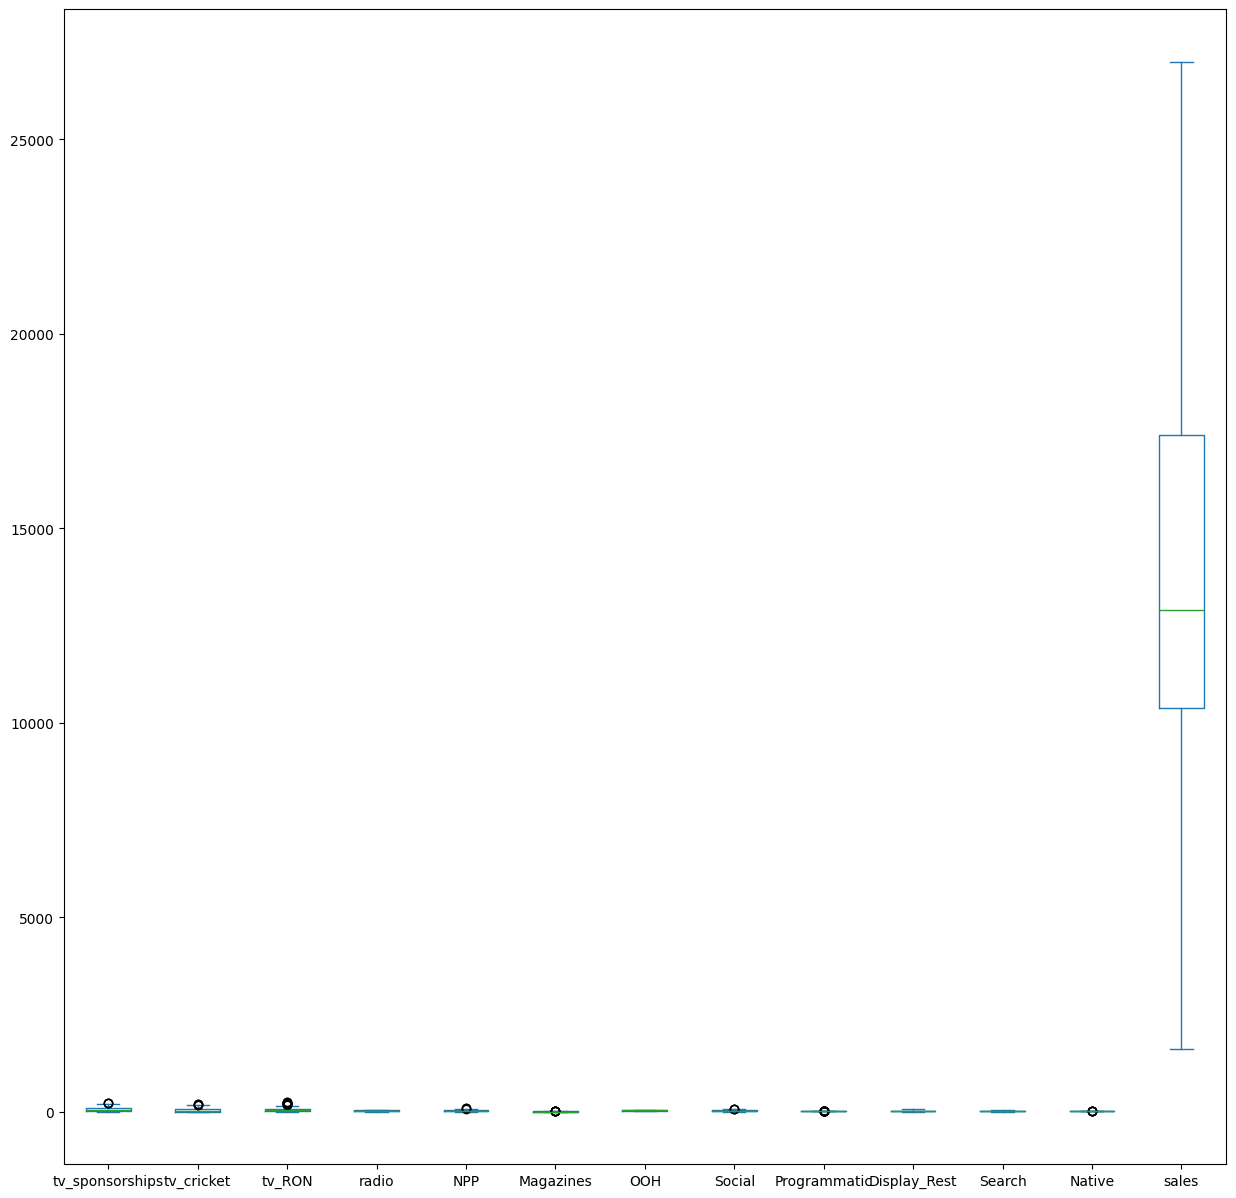

In [7]:
raw_df.plot.box(figsize=(15, 15))

<Axes: >

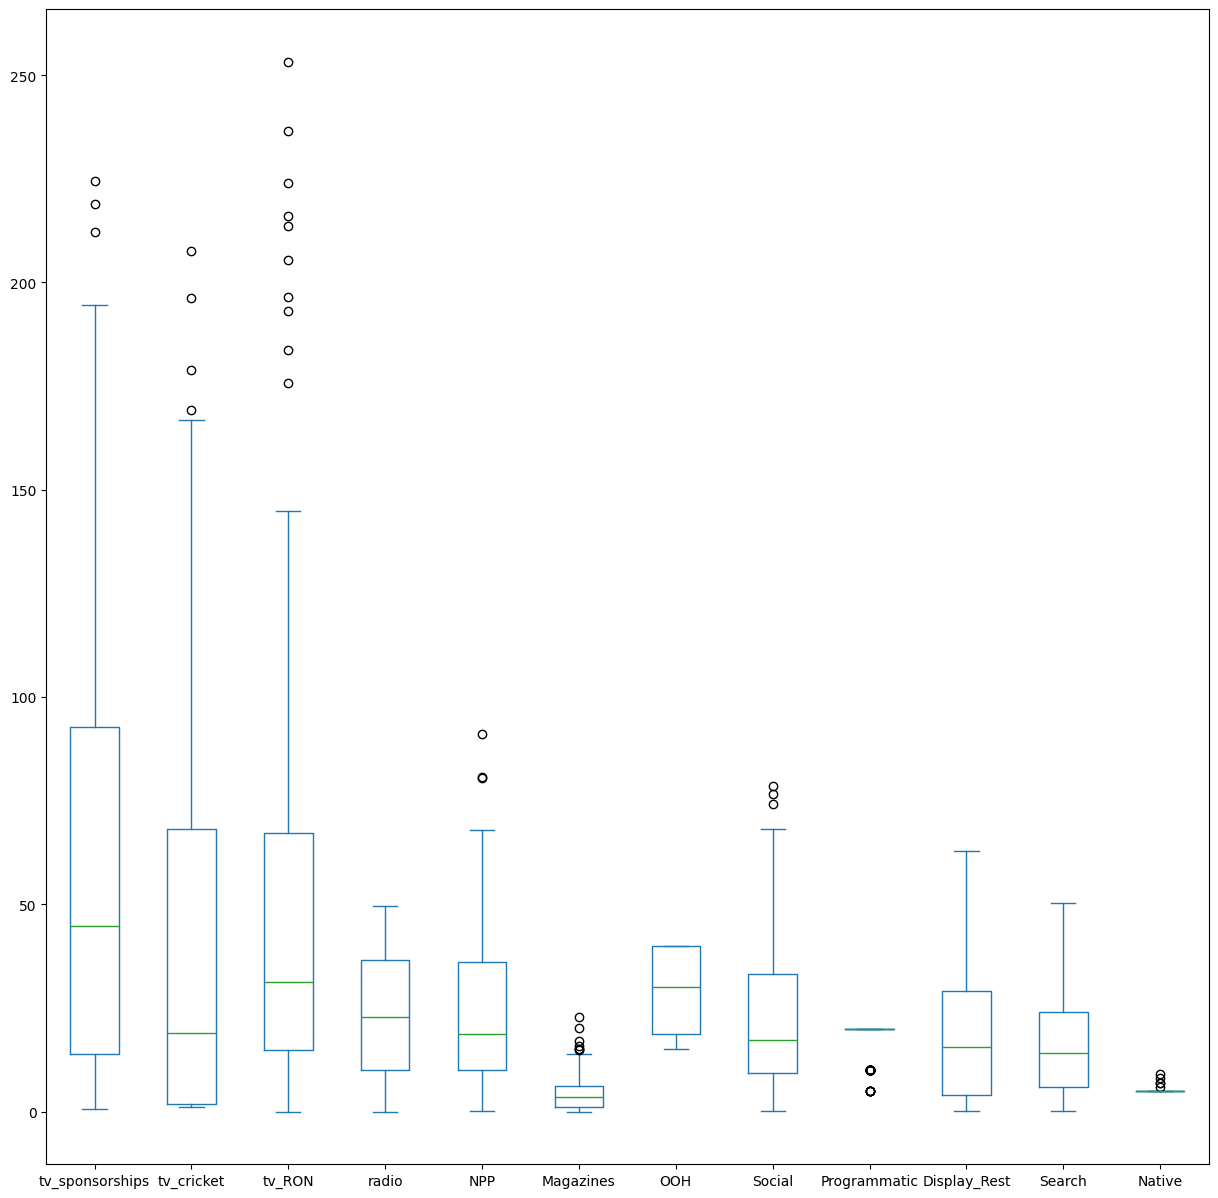

In [8]:
raw_df.drop('sales', axis=1).plot.box(figsize=(15, 15))

In [19]:
raw_df.describe()

,Time,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2008-11-08 14:52:48,59.512390,41.657365,51.143055,23.264000,24.372700,4.543300,29.350000,21.925009,17.650000,18.090883,15.664170,5.060000,14022.500000
min,2001-01-01 00:00:00,0.700000,1.000000,0.000000,0.000000,0.270000,0.030000,15.000000,0.245000,5.000000,0.196000,0.156800,5.000000,1600.000000
25%,2005-01-02 18:00:00,14.017500,1.750000,14.935000,9.975000,10.000000,1.015000,18.750000,9.259250,20.000000,3.986500,5.925920,5.000000,10375.000000
50%,2009-01-04 12:00:00,44.705000,19.022000,31.330000,22.900000,18.800000,3.420000,30.000000,17.329375,20.000000,15.584800,14.106848,5.000000,12900.000000
75%,2013-01-06 06:00:00,92.777500,68.286500,67.262500,36.525000,36.080000,6.185000,40.000000,33.302500,20.000000,29.134560,23.966880,5.000000,17400.000000
max,2017-01-08 00:00:00,224.560000,207.480000,253.260000,49.600000,91.200000,22.800000,40.000000,78.596000,20.000000,62.876800,50.301440,9.000000,27000.000000
std,NaN,50.672105,49.165205,52.431041,14.846809,18.054915,4.187503,10.103858,17.342664,4.508785,14.692380,11.355416,0.408945,5217.456566


In [37]:
Q1 = raw_df.Product_Sold.quantile(.25)
Q3 = raw_df.Product_Sold.quantile(.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Bottom Whisker: {Q1-IQR}")
print(f"Top Whisker: {Q3+IQR}")

Q1: 5922.5
Q3: 8278.0
IQR: 2355.5
Bottom Whisker: 3567.0
Top Whisker: 10633.5


In [35]:
ps_out = (raw_df.Product_Sold < Q1- IQR) | (raw_df.Product_Sold >Q3+IQR)
#raw_df.where(ps_out, raw_df)
raw_df[ps_out]

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
10,667.17,577.85,898.19,970.28,789.52,852.99,11210.0
11,787.33,947.73,884.15,992.30,871.55,742.36,12227.0
96,788.17,825.42,912.89,235.03,938.70,907.57,10763.0
99,283.57,358.42,213.66,29.11,622.68,90.42,3141.0
145,1.04,19.68,900.71,55.67,379.03,63.10,2259.0
176,149.78,191.97,558.87,172.98,412.79,178.45,3335.0
196,610.15,995.32,757.92,622.36,241.99,910.61,10841.0
259,529.95,191.30,89.94,28.84,507.41,256.91,3473.0
269,945.34,825.89,772.20,677.43,401.26,837.18,11062.0
281,480.67,135.75,82.66,217.72,217.90,15.41,2353.0


In [20]:
raw_df.melt(
    id_vars=['Time'],
    value_vars=['tv_sponsorships','tv_cricket','tv_RON',
    'radio','NPP','Magazines','OOH','Social','Programmatic','Display_Rest','Search','Native','sales']
) \
    .groupby('variable') \
        .plot_timeseries(
            'Time', 'value',
            color_column='variable',
            facet_ncol = 2,
            width = 600,
            height = 800,
            legend_show = False
        )

Looking at the outliers fro prodict sales, they do not appear to be so far out of line with the rest of the data as to be unreasonanble by my jugement so it is safe to continue.

Section name here

In [11]:
from pymc_marketing.mmm.delayed_saturated_mm import DelayedSturatedMMM
import arviz as az 
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pymc_marketing.mmm.delayed_saturated_mm'